# This is the pipeline using only libraries

In [2]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
import models as m
import utils as u
import pandas as pd
from surprise.dataset import * 
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.model_selection import GridSearchCV
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [3]:
raw_data = pd.read_csv('data/data_train.csv', header=0, index_col=0, names=['Id', 'rating'])

dataFrame = u.preprocess(raw_data).reset_index().drop(columns=['Id'])

# Data Analysis

In [3]:
dataFrame.describe()

rating          user          item
count  1.048575e+06  1.048575e+06  1.048575e+06
mean   3.892523e+00  5.149863e+03  4.301103e+02
std    1.106656e+00  2.919123e+03  2.402626e+02
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    3.000000e+00  2.604000e+03  2.160000e+02
50%    4.000000e+00  5.245000e+03  4.500000e+02
75%    5.000000e+00  7.736000e+03  6.400000e+02
max    5.000000e+00  1.000000e+04  8.340000e+02

In [4]:
dataFrame.head()

rating  user  item
0       4    44     1
1       3    61     1
2       4    67     1
3       3    72     1
4       5    86     1

In [118]:
x = dataFrame.groupby("user").count().rating
x.head()

user
1     20
2    132
3     80
4     20
5    119
Name: rating, dtype: int64

Text(0,0.5,'Number of users')

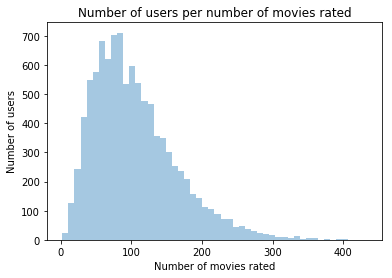

In [125]:
import seaborn as sns 
sns.distplot(x, kde=False);
plt.title('Number of users per number of movies rated')
plt.xlabel('Number of movies rated')
plt.ylabel('Number of users')

In [119]:
y = dataFrame.groupby("item").count().rating
y.head()

item
1     340
2     531
3     792
4    3164
5    1243
Name: rating, dtype: int64

Text(0,0.5,'Number of movie')

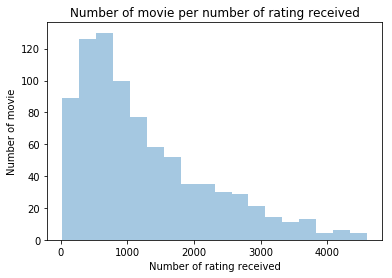

In [127]:
import seaborn as sns 
sns.distplot(y, kde=False);
plt.title('Number of movie per number of rating received')
plt.xlabel('Number of rating received')
plt.ylabel('Number of movie')

Text(0,0.5,'Number of rating')

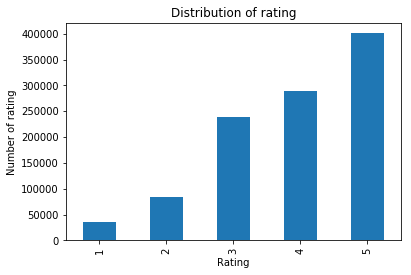

In [122]:
dataFrame.groupby('rating').count().user.plot.bar()
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Number of rating')

In [6]:
reader=Reader(rating_scale=(1.0,5.0))
formatted_data= Dataset.load_from_df(dataFrame[['user','item','rating']],reader)

## Baseline

In [111]:
from surprise import BaselineOnly

# bsl_options = {'method': 'sgd',
#                'learning_rate': .00005,
#                }
algoBL = BaselineOnly(bsl_options)
cross_validate(algoBL, formatted_data, verbose=True,cv=5, measures=['RMSE', 'MAE'])

# param_grid = {}
# gs = GridSearchCV(BaselineOnly, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)
# print(gs.best_score['rmse'])

Estimating biases using sgd...


KeyboardInterrupt: 

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionBase.csv")

## CoClustering

In [119]:
from surprise import CoClustering

# algoCC = m.co_clustering()

# cross_validate(algoCC, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# RMSE: 1.0038 locally, 1.140 online

param_grid = {'n_cltr_u':[2,5],'n_cltr_i': [2, 5]}
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
gs.fit(formatted_data)

# best RMSE score
print(gs.best_score['rmse'])
# best RMSE parameters
print(gs.best_params['rmse'])
n_cltr_u,n_cltr_i=gs.best_params['rmse'].values()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9995553673582398
{'n_cltr_u': 2, 'n_cltr_i': 5}


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.5min finished


In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionCoClustering.csv")

## SVD

In [ ]:
from surprise import SVD


algo = SVD(n_factors=1000, n_epochs=20, lr_all=0.005,reg_all=0.02)
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# FOUND RMSE: 1.0276 locally


# param_grid = {'n_factors':[100,120],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionSVD.csv")

## SVD++

In [10]:
from surprise import SVDpp


algo = SVDpp(verbose=True)
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# FOUND RMSE: 1.0188 locally, 1.179 online


# param_grid = {'n_factors':[100,120],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8


{'test_rmse': array([1.02093862, 1.01702384, 1.01839476]),
 'test_mae': array([0.81505188, 0.81175306, 0.81231825]),
 'fit_time': (947.652890920639, 938.2757539749146, 6517.630364894867),
 'test_time': (40.3932831287384, 40.220656871795654, 41.835325956344604)}

In [11]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionSVDpp.csv")

## NMF

In [8]:
from surprise import NMF

algo = NMF(verbose=True)
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# FOUND RMSE: 1.0089 locally, 1.142 online


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

{'test_rmse': array([1.00904586, 1.00948939, 1.00811702]),
 'test_mae': array([0.81259056, 0.81207535, 0.81233833]),
 'fit_time': (46.000911235809326, 47.70324397087097, 46.69443416595459),
 'test_time': (3.5656747817993164, 2.8772740364074707, 3.1416118144989014)}

In [9]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionNMF.csv")

## KNN on Movie

In [ ]:
from surprise import KNNBasic


algo =m.movie_knn()
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE']) # FOUND RMSE: 1.0603 locally, 1.133 online

# param_grid = {'n_neighbors':[3,5,9],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionKNNMovie.csv")

## KNN on User

In [ ]:
from surprise import KNNBasic


algo =m.user_knn()
cross_validate(algo, formatted_data, verbose=True,cv=3, measures=['RMSE', 'MAE'])# RMSE: 1.0420 locally, 1.140 online

# param_grid = {'n_neighbors':[3,5,9],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)

# # best RMSE score
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionKNNUser.csv")

## Slope One

In [ ]:
from surprise import SlopeOne

algo = SlopeOne()
cross_validate(algo, formatted_data, verbose=True,cv=5, measures=['RMSE', 'MAE'])# RMSE: 0.9923 locally, 1.143 online

# param_grid = {}
# gs = GridSearchCV(SlopeOne, param_grid, measures=['rmse', 'mae'], cv=3,joblib_verbose=1, n_jobs=-1)
# gs.fit(formatted_data)
# print(gs.best_score['rmse'])

In [ ]:
ids, preds = u.predict_on_model(algo)
u.create_csv_submission(ids, preds, "submissionSlopeOne.csv")

## Blending

In [158]:
def df_from_model_pred(model_pred):
    list=[]
    for pred in model_pred:
#         list.append(int(round(pred.est))) #TODO check if you should round here!!
        list.append(pred.est)
    return pd.DataFrame(list)


In [179]:
from sklearn.linear_model import Ridge
from surprise import BaselineOnly,CoClustering,SVD,SVDpp,NMF, SlopeOne

trainset, testset = train_test_split(formatted_data, test_size=.1)

y_val = []
for a,b,c  in testset:
    y_val.append(c)
df_y_val=pd.DataFrame(y_val)

print("-Training CoCluster")
algoCC= CoClustering(n_cltr_i=n_cltr_i, n_cltr_u=n_cltr_u)
algoCC.fit(trainset)

print("-Training Baseline")
algoBL=BaselineOnly()
algoBL.fit(trainset)


print("-Training SVD")
algoSVD=SVD( n_epochs=30, lr_all=0.001,reg_all=0.01)
algoSVD.fit(trainset)

print("-Training SVD++")
algoSVDpp = SVDpp(n_epochs=30, lr_all=0.001,reg_all=0.01)
algoSVDpp.fit(trainset)

print("-Training NMF")
algoNMF = NMF()
algoNMF.fit(trainset)

print("-Training KNN on movie")
algoKNNMovie =m.movie_knn()
algoKNNMovie.fit(trainset)

print("-Training KNN on user")
algoKNNUser =m.user_knn()
algoKNNUser.fit(trainset)

print("-Training Slope One")
algoSO = SlopeOne()
algoSO.fit(trainset)

test_predCC=algoCC.test(testset)
dfCC=df_from_model_pred(test_predCC)

test_predBL=algoBL.test(testset)
dfBL=df_from_model_pred(test_predBL)


test_predSVD=algoSVD.test(testset)
dfSVD=df_from_model_pred(test_predSVD)

test_predSVDpp=algoSVDpp.test(testset)
dfSVDpp=df_from_model_pred(test_predSVDpp)

test_predNMF=algoNMF.test(testset)
dfNMF=df_from_model_pred(test_predNMF)

test_predKNNMovie=algoKNNMovie.test(testset)
dfKNNMovie=df_from_model_pred(test_predKNNMovie)

test_predKNNUser=algoKNNUser.test(testset)
dfKNNUser=df_from_model_pred(test_predKNNUser)

test_predSO=algoSO.test(testset)
dfSO=df_from_model_pred(test_predSO)



df_val=pd.concat([dfCC,dfBL,dfSVD,dfSVDpp,dfNMF,dfKNNMovie,dfKNNUser,dfSO],axis=1)


model = Ridge()
model.fit(df_val,y_val)
print(model.coef_)





-Training CoCluster
-Training Baseline
Estimating biases using als...
-Training SVD
-Training SVD++
-Training NMF
-Training KNN on movie
Computing the pearson similarity matrix...
Done computing similarity matrix.
-Training KNN on user
Computing the pearson similarity matrix...
Done computing similarity matrix.
-Training Slope One
[ 0.16653047 -1.52433762  0.06870001  0.76841581 -0.04698223  0.24786137
  0.39058662  1.11812907]


In [185]:
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
model = LogisticRegression(multi_class='ovr')
model.fit(df_val,y_val)
print(model.coef_)



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
  -0.44673808  0.0176827 ]
 [-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
  -0.77220534  0.12949143]
 [-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
  -0.37164858 -0.97066771]
 [ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
   0.16276788 -2.51478435]
 [-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
   0.66669977  4.46154836]]


In [188]:
model.classes_

array([1., 2., 3., 4., 5.])

In [180]:
ids, preds = u.predict_on_models([algoCC, algoBL,algoSVD, algoSDVpp,algoNMF,algoKNNMovie,algoKNNUser,algoSO],model.coef_)
u.create_csv_submission(ids, preds, "submissionBlended6.csv")

In [191]:
ids, preds = u.predict_on_models2([algoCC, algoBL,algoSVD, algoSDVpp,algoNMF,algoKNNMovie,algoKNNUser,algoSO],model.coef_)
u.create_csv_submission(ids, preds, "submissionBlended7.csv")

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.480274

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.664725

[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.480274

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.664725

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.032568

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.480274

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.032568

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.076394

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.032568

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.480274

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.032568

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.664725

[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.076394

[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.032568

[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.076394

[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.664725

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.076394

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.664725

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.076394

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.666699

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.446738

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.371648

 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.772205

  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.162767

[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.742598

[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.032568

[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.48027448  0.7332889  -0.09392349 -1.01723498  0.00660961 -0.56311191
 -0.77220534  0.12949143]
[-0.07639425  1.30590941  0.04284732 -0.78749298 -0.15765589 -0.21570189
 -0.37164858 -0.97066771]
[ 0.66472563  1.98293732  0.12083804 -0.24792527 -0.14095925  0.40273038
  0.16276788 -2.51478435]
[-0.03256877 -4.93129015  0.07749893  1.6190331  -0.05054943  0.08810709
  0.66669977  4.46154836]
[-0.74259884  0.96231199 -0.17786715 -1.27594643 -0.07309134 -0.66712532
 -0.44673808  0.0176827 ]
[-0.480274

KeyboardInterrupt: 